📌 Q5. KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!

지금까지 익힌 방법으로 다른 데이터에도 같은 방법을 통해 분석해 볼 수 있을 것입니다.
KOSIS(https://kosis.kr/) 사이트에서 관심있는 분야의 데이터를 찾고 원하는 시각화를 해주세요!
조회조건에 계, 합계 등을 미리 제거하고 다운로드 받으면 전처리를 줄일 수 있습니다.
행렬전환 기능을 사용하면 따로 melt를 진행하지 않아도 되기 때문에 이 또한 전처리를 줄일 수 있습니다.


In [7]:
!pip install koreanize-matplotlib

In [8]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

In [245]:
# 1. 데이터 전처리

## 가구원수별
df_count = pd.read_csv("./가구원수별.csv",encoding="cp949")
## 가구주 교육별
df_education = pd.read_csv("./가구주교육별.csv",encoding="cp949")
## 가구주 연령별
df_old = pd.read_csv("./가구주연령별.csv",encoding="cp949")
## 소득10분위별
df_earn = pd.read_csv("./소득10분위별.csv",encoding="cp949")

In [246]:
## 데이터 shape 확인
print(df_count.shape)
print(df_education.shape)
print(df_old.shape)
print(df_earn.shape)

(522, 61)
(348, 59)
(435, 61)
(957, 61)


In [247]:
## 없는 컬럼 확인
for col in df_count.columns :
  if col not in df_education.columns :
    print(col)

가구원수별
단위
Unnamed: 60


In [248]:
## 열 맞추기
df_count.drop(["단위", "Unnamed: 60"], axis=1, inplace=True)
df_old.drop(["단위", "Unnamed: 60"], axis=1, inplace=True)
df_earn.drop(["단위", "Unnamed: 60"], axis=1, inplace=True)

# 옆 단위 지우기
df_education["가계수지항목별"] = df_education["가계수지항목별"].map(lambda x:x[:-4])

In [256]:
## 조건들 목록담기
count_list = df_count[df_count.columns[0]].unique()[1:]
education_list = df_education[df_education.columns[0]].unique()[1:]
old_list = df_old[df_old.columns[0]].unique()[1:]
earn_list = df_earn[df_earn.columns[0]].unique()[1:]

In [132]:
## 전체 조건 데이터프레임 따로 담기
df_all = df_old[df_old[df_old.columns[0]].str.contains("전체")]

In [133]:
## 열이름 정리
df_list = [df_count, df_education, df_old, df_earn]

for i in df_list :
  i.rename(columns = {i.columns[0] : '조건'}, inplace=True)
  filter = i['조건'] == i['조건'].unique()[0]
  i.drop(i[filter].index, inplace=True)

df_all.rename(columns = {df_all.columns[0] : '조건'}, inplace=True)
df_list.append(df_all)

<ipython-input-133-2af3be2d1757>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all.rename(columns = {df_all.columns[0] : '조건'}, inplace=True)


In [134]:
## 데이터프레임 합치기
df_concat = pd.concat(df_list)
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001 entries, 87 to 86
Data columns (total 59 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   조건        2001 non-null   object 
 1   가계수지항목별   2001 non-null   object 
 2   항목        2001 non-null   object 
 3   2006.1/4  2001 non-null   float64
 4   2006.2/4  2001 non-null   float64
 5   2006.3/4  2001 non-null   float64
 6   2006.4/4  2001 non-null   float64
 7   2007.1/4  2001 non-null   float64
 8   2007.2/4  2001 non-null   float64
 9   2007.3/4  2001 non-null   float64
 10  2007.4/4  2001 non-null   float64
 11  2008.1/4  2001 non-null   float64
 12  2008.2/4  2001 non-null   float64
 13  2008.3/4  2001 non-null   float64
 14  2008.4/4  2001 non-null   float64
 15  2009.1/4  2001 non-null   float64
 16  2009.2/4  2001 non-null   float64
 17  2009.3/4  2001 non-null   float64
 18  2009.4/4  2001 non-null   float64
 19  2010.1/4  2001 non-null   float64
 20  2010.2/4  2001 non-null   float

In [135]:
## 데이터 전처리 완료
df = df_concat.melt(id_vars=df_concat.columns[:3], value_vars=df_concat.columns[3:], var_name="시점", value_name="데이터")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112056 entries, 0 to 112055
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   조건       112056 non-null  object
 1   가계수지항목별  112056 non-null  object
 2   항목       112056 non-null  object
 3   시점       112056 non-null  object
 4   데이터      99811 non-null   object
dtypes: object(5)
memory usage: 4.3+ MB


In [136]:
df.head()

,조건,가계수지항목별,항목,시점,데이터
0,1인,가구원수,전체가구,2006.1/4,1.0
1,1인,가구원수,근로자가구,2006.1/4,1.0
2,1인,가구원수,근로자외가구,2006.1/4,1.0
3,1인,가구주연령,전체가구,2006.1/4,52.771
4,1인,가구주연령,근로자가구,2006.1/4,42.334


In [231]:
df["연도"] = df["시점"].map(lambda x : int(x.split(".")[0]))
df["데이터"] = df['데이터'].map(lambda x : float(x) if x != "-" else "")
df.head()

,조건,가계수지항목별,항목,시점,데이터,연도
0,1인,가구원수,전체가구,2006.1/4,1.0,2006
1,1인,가구원수,근로자가구,2006.1/4,1.0,2006
2,1인,가구원수,근로자외가구,2006.1/4,1.0,2006
3,1인,가구주연령,전체가구,2006.1/4,52.771,2006
4,1인,가구주연령,근로자가구,2006.1/4,42.334,2006


In [228]:
df["데이터"].unique()

array([1.0, 52.771, 42.334, ..., 3060371.002, 3656728.512, 2308653.462],
      dtype=object)

In [138]:
df["조건"].unique()

array(['1인', '2인', '3인', '4인', '5인이상', '  중졸이하', '  고졸', '  전문대졸이상',
       '39세이하가구', '40~49세가구', '50~59세가구', '60세이상 가구', '１분위', '２분위', '３분위',
       '４분위', '５분위', '６분위', '７분위', '８분위', '９분위', '１０분위', '전체'],
      dtype=object)

In [139]:
df["가계수지항목별"].unique()

array(['가구원수', '가구주연령', '가구분포', '소득', '\u3000경상소득', '\u3000\u3000근로소득',
       '\u3000\u3000사업소득', '\u3000\u3000재산소득', '\u3000\u3000이전소득',
       '\u3000비경상소득', '가계지출', '소비지출', '01.식료품 · 비주류음료', '02.주류 · 담배',
       '03.의류 · 신발', '04.주거 · 수도 · 광열', '05.가정용품 · 가사서비스', '06.보건',
       '07.교통', '08.통신', '09.오락 · 문화', '10.교육', '11.음식 · 숙박',
       '12.기타상품 · 서비스', '비소비지출', '처분가능소득', '흑자액', '흑자율', '평균소비성향'],
      dtype=object)

**✒ 1. 가구형태 변화 및 전체 및 가구원수별 고령화 추이 **
---------------------------------------------------------------

Text(0.5, 1.0, '전체 가구주 연령 추이')

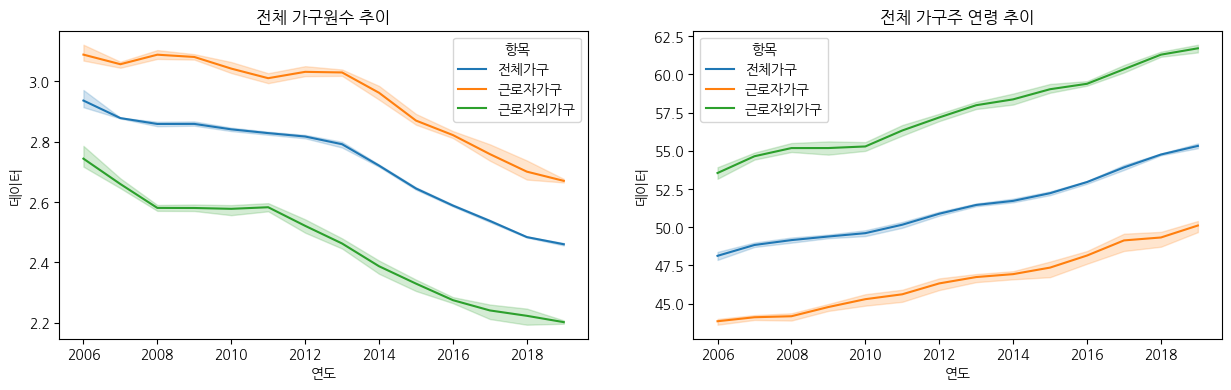

In [147]:
filter_1 = (df["조건"] == "전체") & (df["가계수지항목별"] == "가구원수")
filter_2 = (df["조건"] == "전체") & (df["가계수지항목별"] == "가구주연령")


plt.figure(figsize=(15,4))
plt.subplot(121)
sns.lineplot(data=df[filter_1], x="연도", y="데이터", hue="항목")
plt.title("전체 가구원수 추이")

plt.subplot(122)
sns.lineplot(data=df[filter_2], x="연도", y="데이터", hue="항목")
plt.title("전체 가구주 연령 추이")

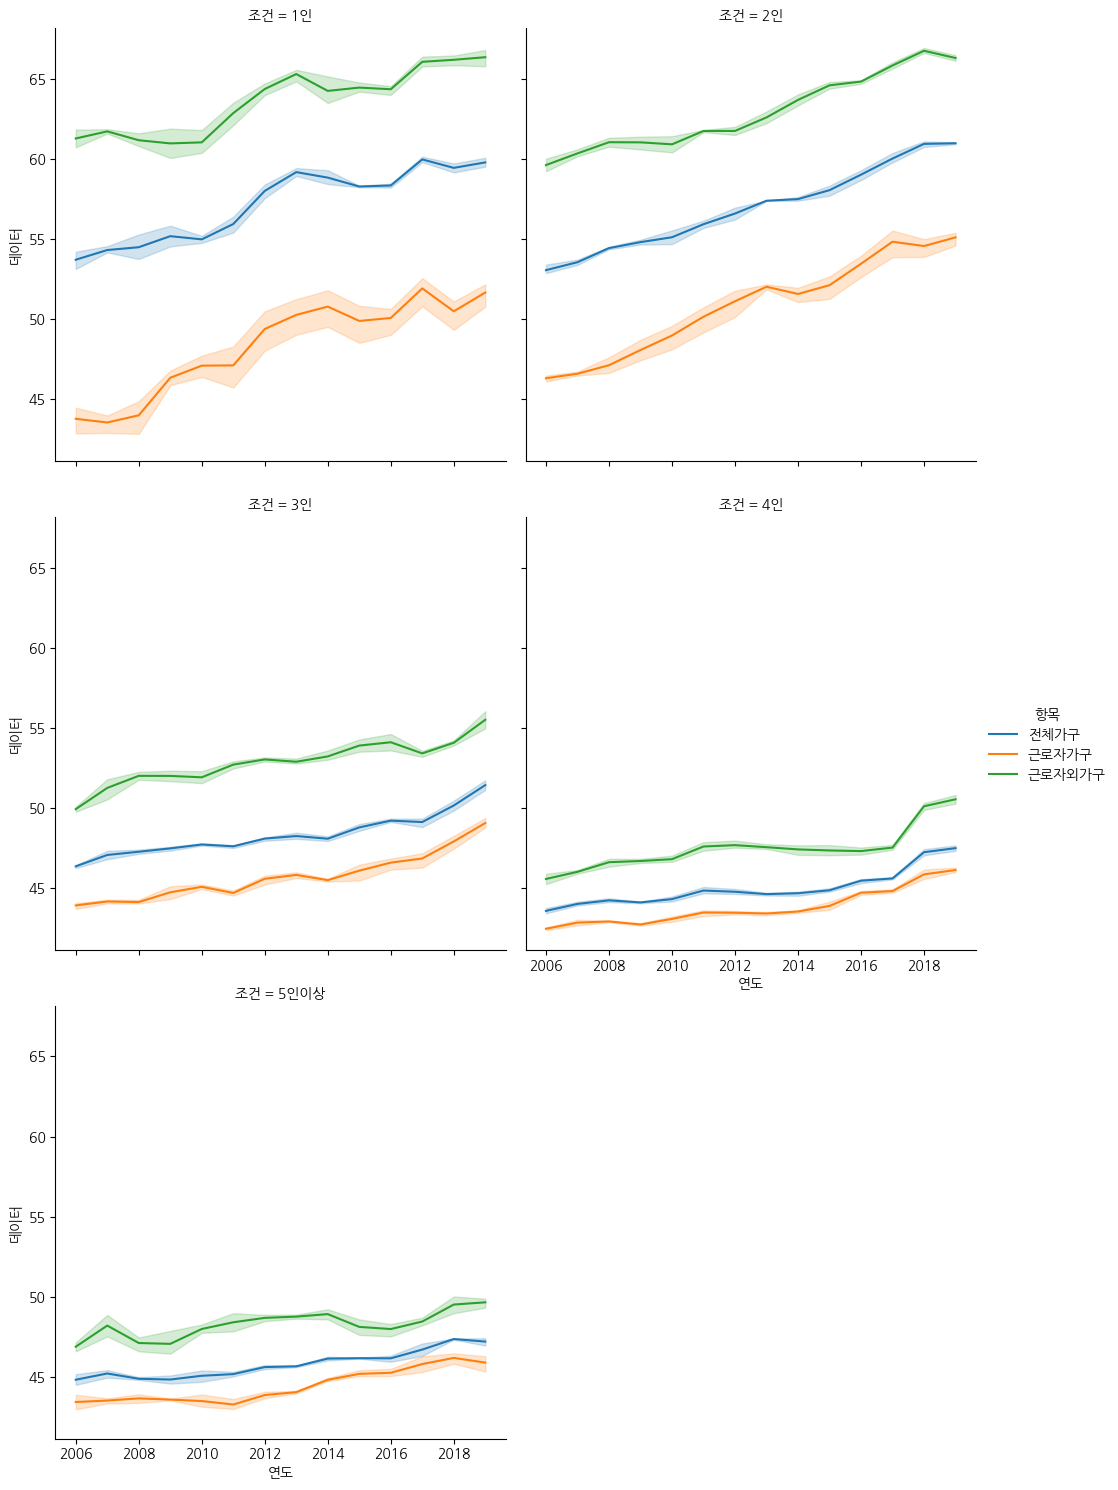

In [166]:
filter_3 = (df["조건"].isin(count_list)) & (df["가계수지항목별"] == "가구주연령")
sns.relplot(data=df[filter_3], x="연도", y="데이터", hue="항목", kind='line', col="조건", col_wrap=2)

✅ 대한민국 가구형태는 핵가족화가 진행 중이고, 전반적으로 고령화(가구주의 연령 기준)가 진행되고 있다.

가구원수별로 보면 1인 가구일수록 고령화가 더욱 심각하고, 근로자보다 ***근로자외(사업자 또는 무직자)의 경우가 고령화가 더욱 진행됨***

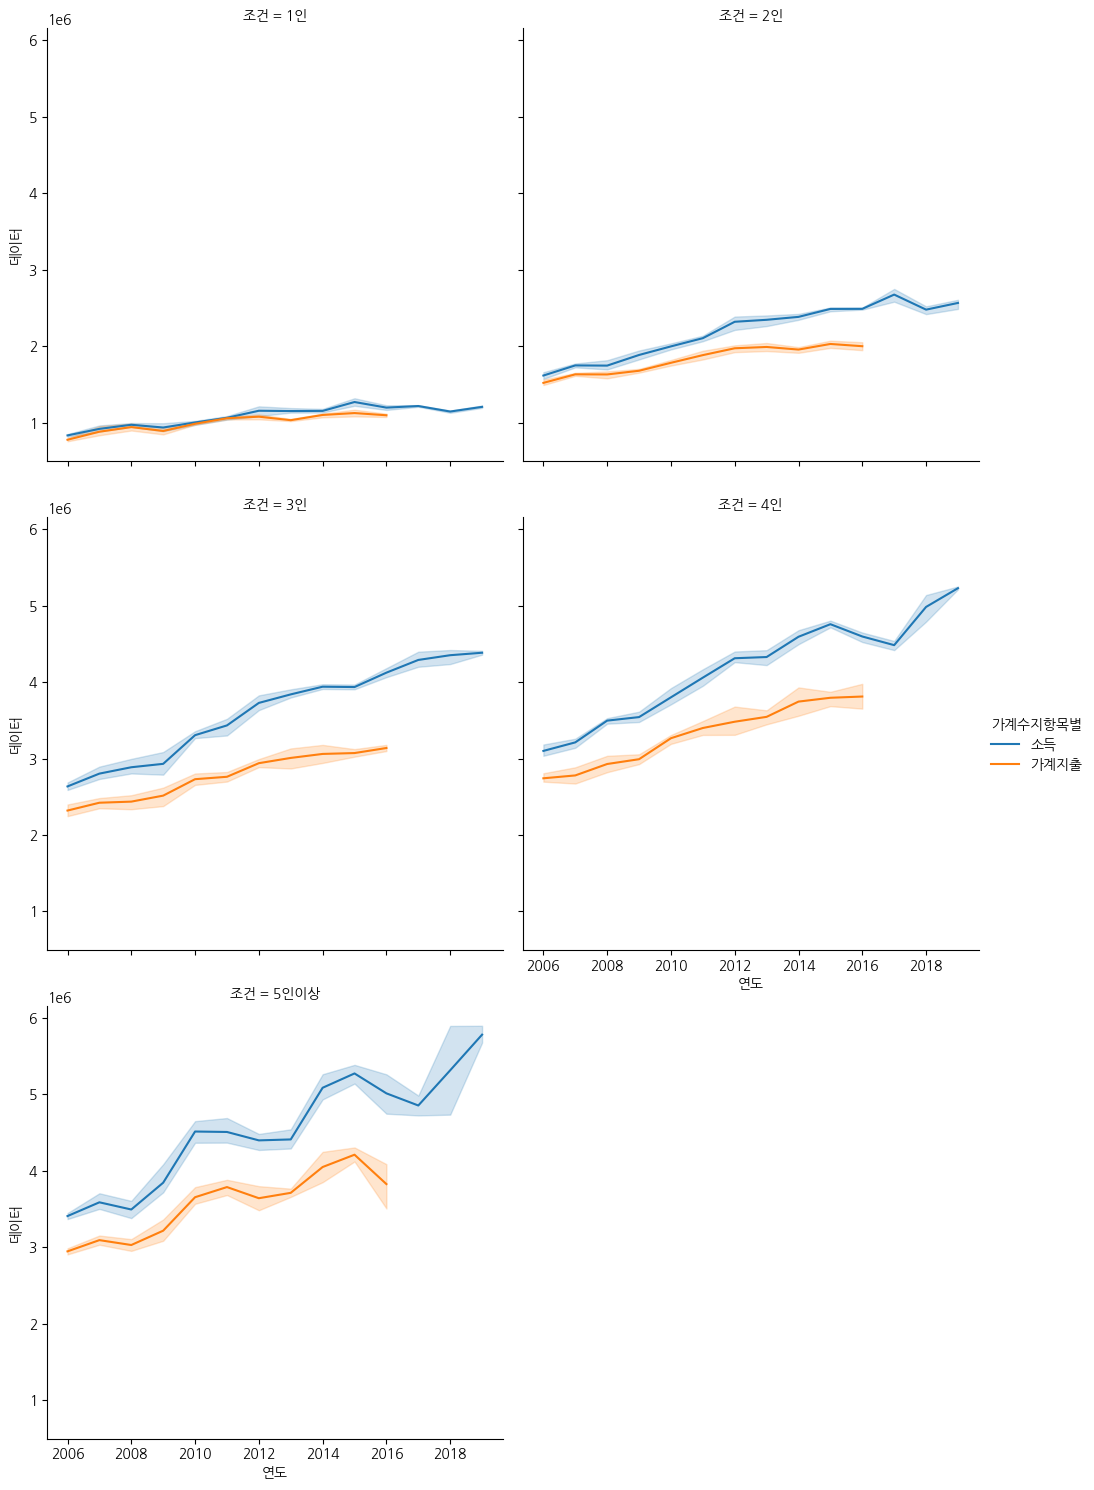

In [171]:
filter_4 = (df["조건"].isin(count_list)) & (df["가계수지항목별"].isin(["소득","가계지출"])) & (df["항목"] == "근로자외가구")
sns.relplot(data=df[filter_4], x="연도", y="데이터", hue="가계수지항목별", kind='line', col="조건", col_wrap=2)

✅ 더욱이, 1인가구의 근로자외(사업자+무직자)의 명목소득과 가계지출의 차이가 상대적으로 성장하지 않아, 하루벌어 하루 사는 인구가 많을 것으로 예상됨

**✒ 2. 소득분위별 및 교육수준별 소득수준 변화**
----------------------------------------------------

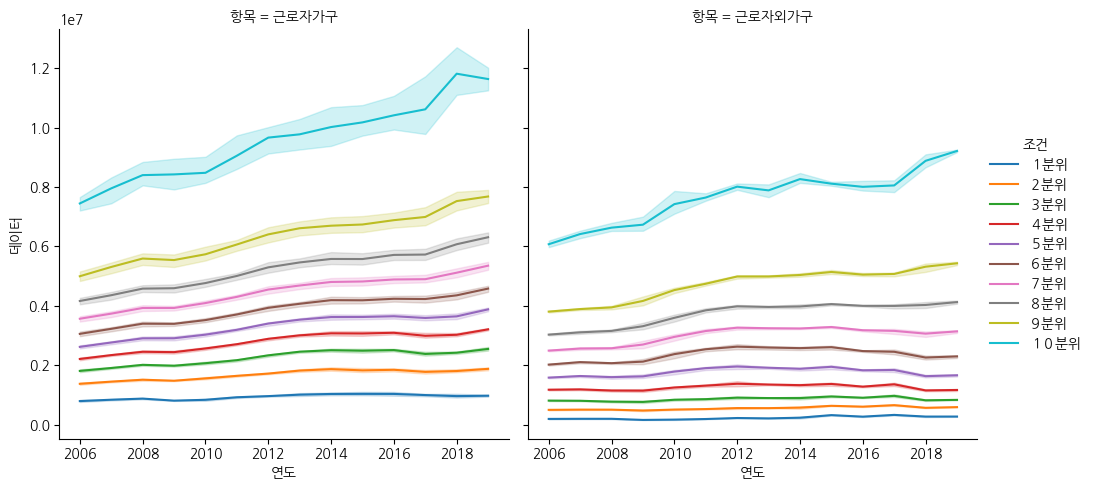

In [183]:
where_1 = (df["조건"].isin(earn_list)) & (df["가계수지항목별"].isin(["소득"])) & (df["항목"] != "전체가구")
sns.relplot(data=df[where_1], x="연도", y="데이터", hue="조건", kind='line', col="항목", col_wrap=2)

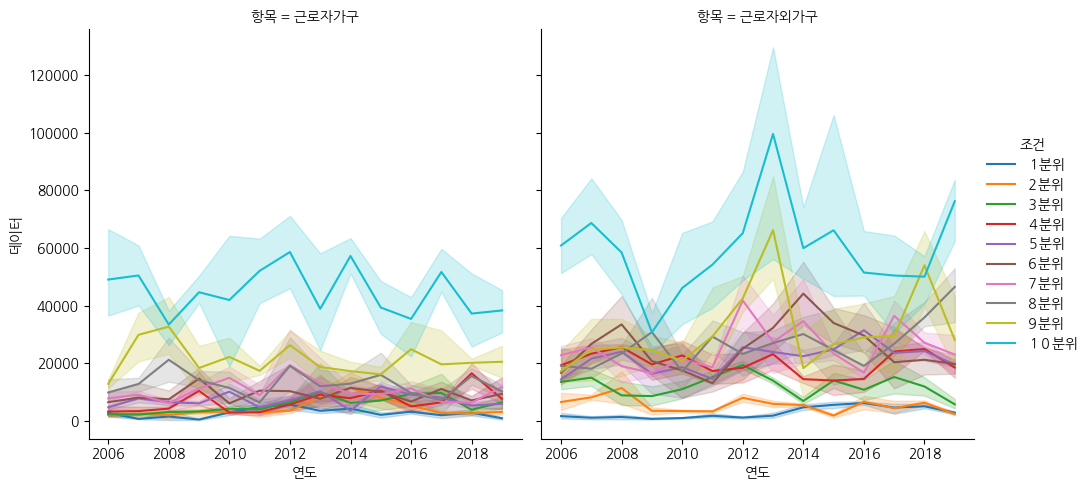

In [187]:
where_2 = (df["조건"].isin(earn_list)) & (df["가계수지항목별"].isin(["\u3000\u3000재산소득"])) & (df["항목"] != "전체가구")
sns.relplot(data=df[where_2], x="연도", y="데이터", hue="조건", kind='line', col="항목", col_wrap=2)

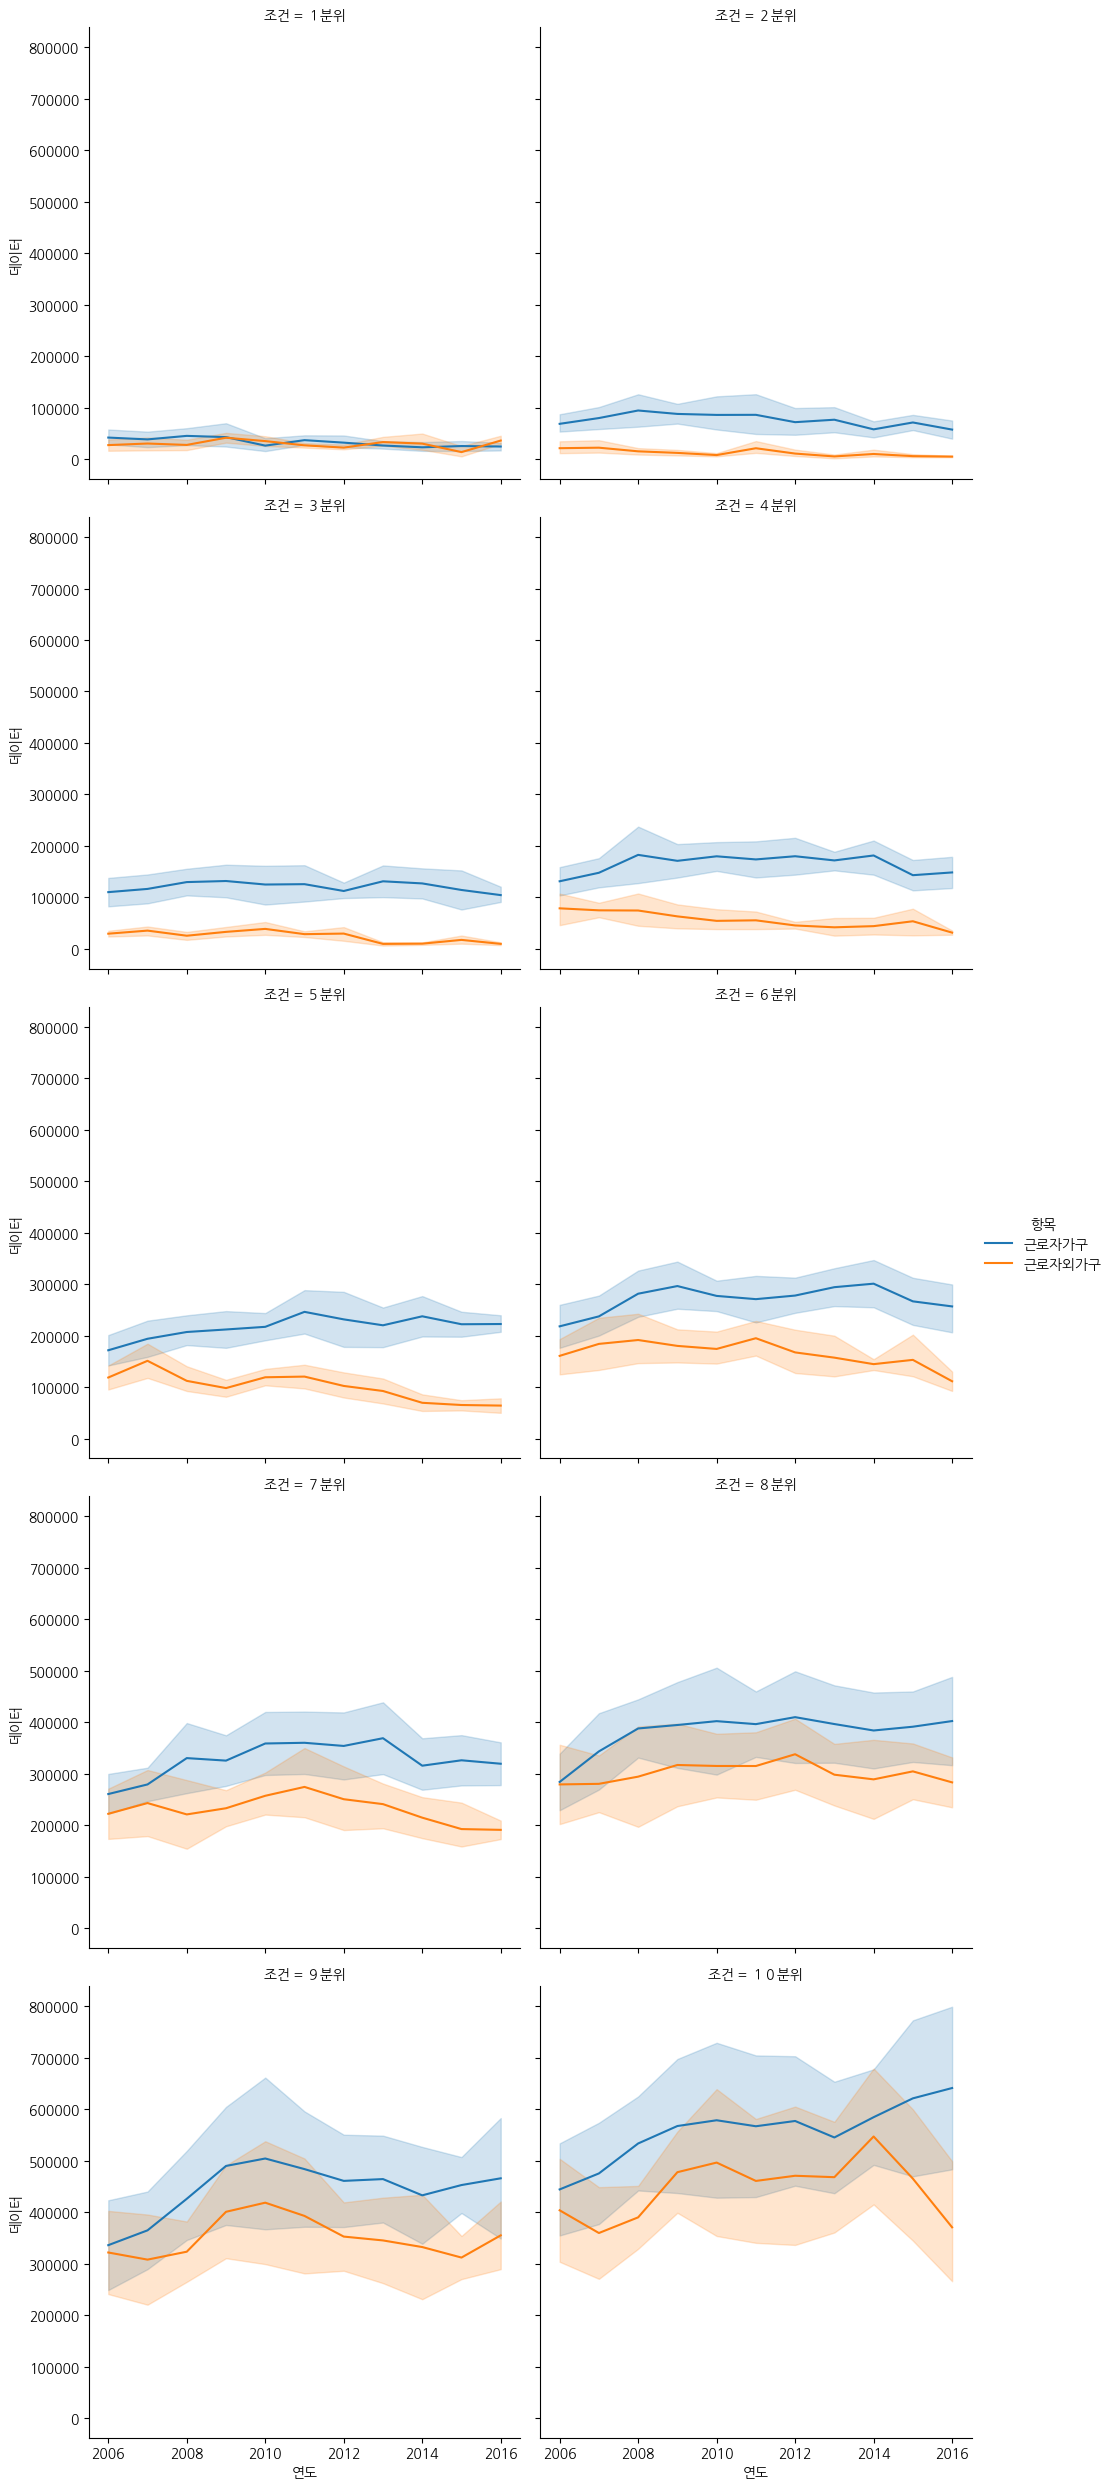

In [189]:
where_3 = (df["조건"].isin(earn_list)) & (df["가계수지항목별"].isin(["10.교육"])) & (df["항목"] != "전체가구")
sns.relplot(data=df[where_3], x="연도", y="데이터", hue="항목", kind='line', col="조건", col_wrap=2)

✅ 전 분위에서 명목 소득 격차는 커지고 있는 경향을 보임. 특히 근로자가구의 경우가 더욱 벌어짐

✅ 재산소득은 경기에 따라 크게 차이나나, 9분위/10분위쯤은 되어야 큰 차이를 보이는 것으로 보이고, 근로자외가구의 경우가 폭이 큼

✅ 교육비 지출의 경우, 1분위를 제외한 전 분위에서 가구주가 근로자일 경우 더욱 투자하는 경향을 보임


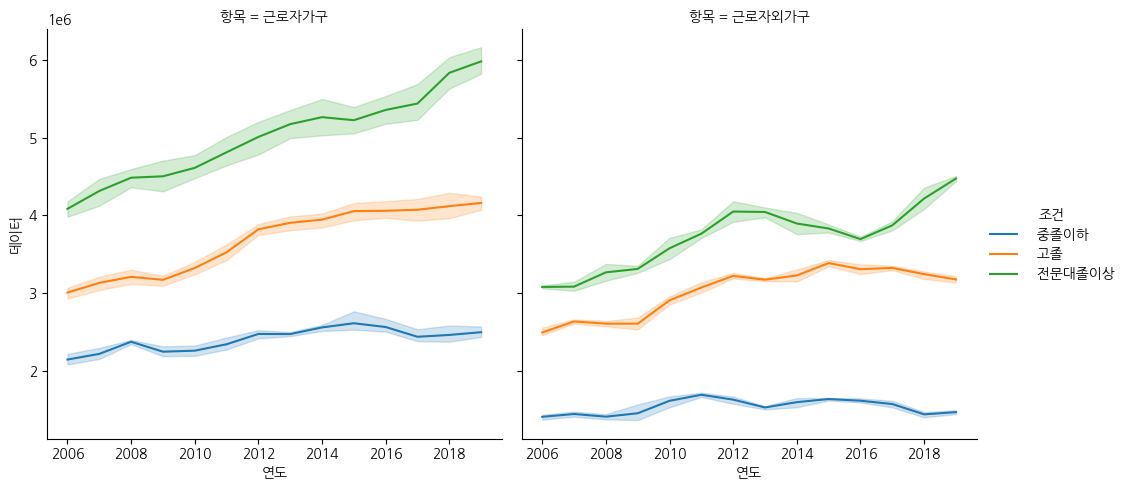

In [238]:
where_4 = (df["조건"].isin(education_list)) & (df["가계수지항목별"].isin(["소득"])) & (df["항목"] != "전체가구")
sns.relplot(data=df[where_4], x="연도", y="데이터", hue="조건", kind='line', col="항목", col_wrap=2)

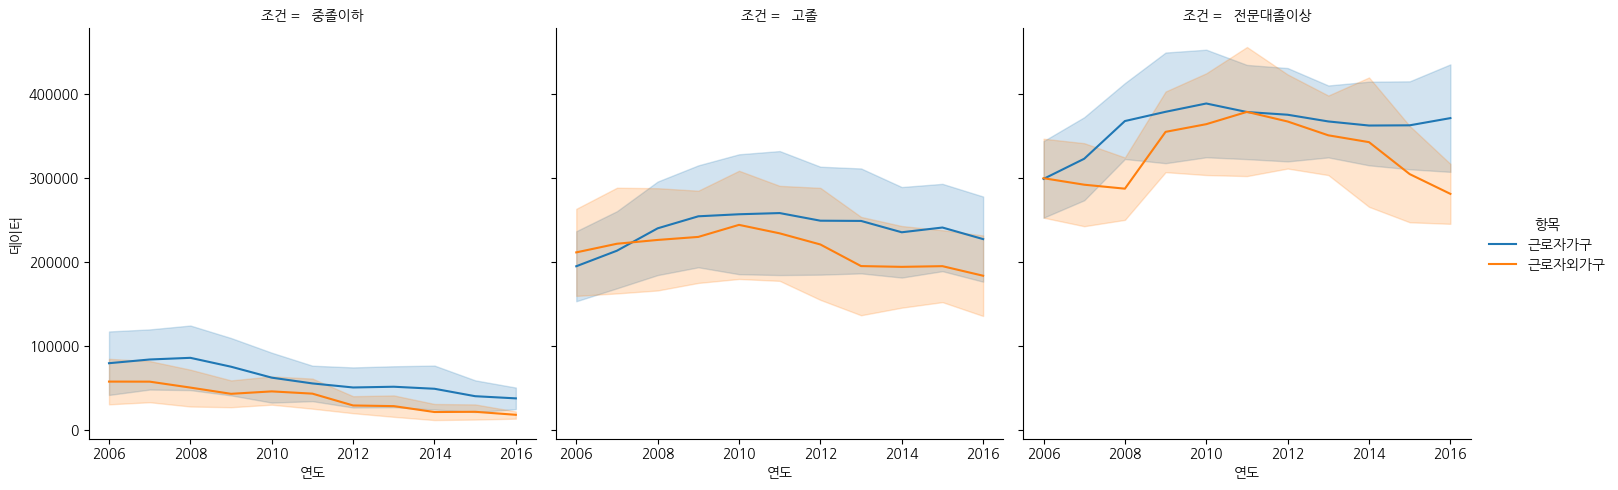

In [255]:
where_5 = (df["조건"].isin(education_list)) & (df["가계수지항목별"].isin(["10.교육"])) & (df["항목"] != "전체가구")
g = sns.relplot(data=df[where_5], x="연도", y="데이터", hue="항목", kind='line', col="조건", col_wrap=3)
g.fig.axes[0].invert_yaxis()
plt.show()

✅ 학력에 의한 소득격차도 커지는 추세

✅ 교육비 지출의 경우, 학력이 오를 수록 증가하는 추세